## Set GPU and load packages

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import gpustat

stats = gpustat.GPUStatCollection.new_query()
ids = map(lambda gpu: int(gpu.entry['index']), stats)
ratios = map(lambda gpu: float(gpu.entry['memory.used'])/float(gpu.entry['memory.total']), stats)
bestGPU = min(zip(ids, ratios), key=lambda x: x[1])[0]

print("setGPU: Setting GPU to: {}".format(bestGPU))
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = str(bestGPU)

setGPU: Setting GPU to: 0


In [24]:
# IMPORT
import numpy as np

import keras
from keras import optimizers
from keras.datasets import cifar10 # we can use also cifar100
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import regularizers

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
import sklearn.metrics

#print(sklearn.__version__)

## Loading models

In [8]:
# Loading first model (without l2, lr=0.01)
model0 = load_model('models/model0.h5')
# Loading the initial and final weights of that model
model0.load_weights('models/model0_weights0.h5')
weights0_0 = model0.get_weights()
model0.load_weights('models/model0_weights25.h5')
weights0_25 = model0.get_weights()

In [9]:
# Loading second model (with l2, lr=0.01)
model1 = load_model('models/model1.h5')
# Loading the initial and final weights of that model
model1.load_weights('models/model1_weights0.h5')
weights1_0 = model1.get_weights()
model1.load_weights('models/model1_weights25.h5')
weights1_25 = model1.get_weights()

In [10]:
# Loading third model (with l2, lr=0.02 then 0.01)
model2 = load_model('models/model2.h5')
# Loading the initial and final weights of that model
model2.load_weights('models/model2_weights0.h5')
weights2_0 = model2.get_weights()
model2.load_weights('models/model2_weights25.h5')
weights2_25 = model2.get_weights()

## Weights distribution per layer
Tester les deltas de poids pour une couche, mais aussi pour qq neurones seuls.
Normaliser par rapport aux poids initiaux ou finaux.

Regarder les poids qui changent le plus pour un neurone, et faire un histogramme pour plusieurs neurones. Voir si il y a un pique, ou plusieurs lorsqu'on generalise mieux ou pas.

$w_0 \cdot w_t ~= 0$ si orthogonaux (donc plus de chance de bien generaliser car tous les poids ont bougés de leur position initiale)

In [58]:
from numpy.linalg import norm
from collections import defaultdict

# initializing variables
n_layers = len(weights0_0)
dweights0 = defaultdict(list)
dweights1 = defaultdict(list)
dweights2 = defaultdict(list)

# for each layer : calculating the difference in the weights (final - initial)
for layer in range(n_layers):
    n_neurons0 = weights0_0[layer].size
    dweights0[layer] = np.absolute(weights0_25[layer].reshape(n_neurons0,1) - weights0_0[layer].reshape(n_neurons0,1)) / norm(weights0_25[layer].reshape(n_neurons0,1), np.inf)
    n_neurons1 = weights1_0[layer].size
    dweights1[layer] = np.absolute(weights1_25[layer].reshape(n_neurons1,1) - weights1_0[layer].reshape(n_neurons1,1)) / norm(weights1_25[layer].reshape(n_neurons0,1), np.inf)
    n_neurons2 = weights2_0[layer].size
    dweights2[layer] = np.absolute(weights2_25[layer].reshape(n_neurons2,1) - weights2_0[layer].reshape(n_neurons2,1)) / norm(weights2_25[layer].reshape(n_neurons0,1), np.inf)

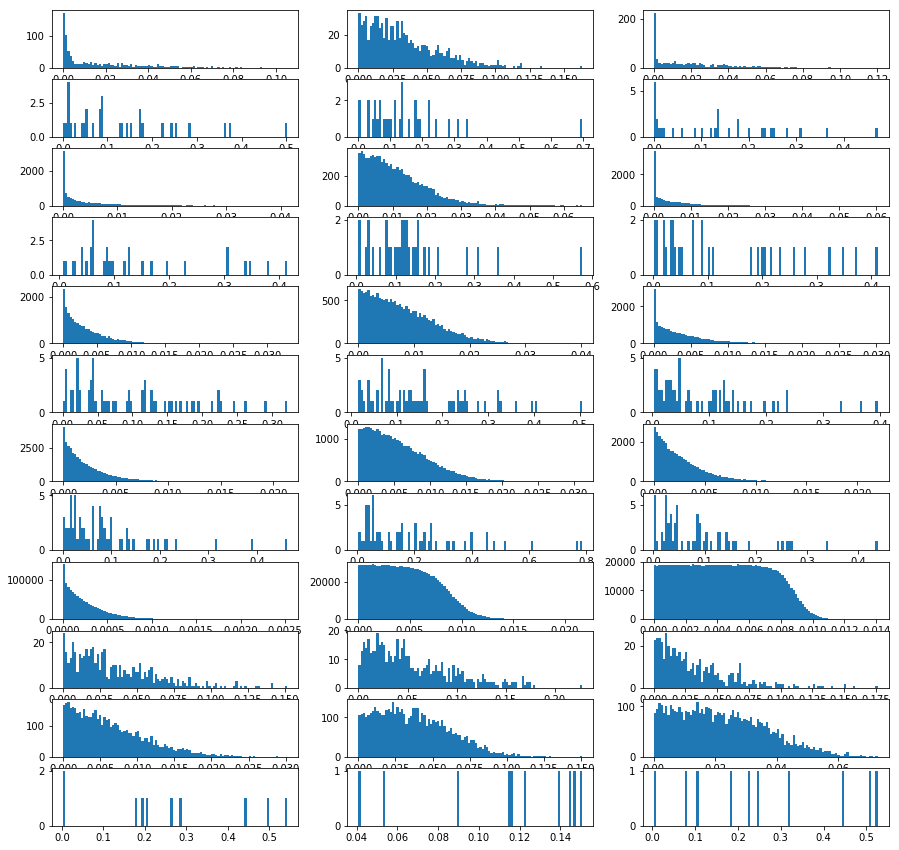

In [100]:
dweights = [dweights0, dweights1, dweights2]
f, axs = plt.subplots(n_layers, 3, figsize=(15,15))
for layer in range(n_layers):
    for i in range(3):
        #axs[layer,i].subplot(n_layers,3,(i+1)+layer*3)
        axs[layer,i].hist(dweights[i][layer], bins=100, histtype='stepfilled')  # arguments are passed to np.histogram

f.show()

## Weights distribution per neuron in a Dense layer

In [ ]:
model0.layers[3].